<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Unsupervised%20Learning/%ED%95%B8%EC%A6%88%EC%98%A8%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5/Ch_3_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**차원 축소에 대한 동기 부여**

* 고차원 데이터를 저차원 공간에 투영해 중복 정보를 제거하면서 가능한 핵심 정보를 유지
* 데이터를 낮은 차원으로 축소시키면 노이즈가 많이 줄어들기 때문에 머신러닝 알고리즘이 흥미로운 패턴을 더 효과적이고 효율적으로 식별할 수 있음

# Setting

## Github Clone

In [ ]:
!git clone https://github.com/francis-kang/handson-unsupervised-learning.git

Cloning into 'handson-unsupervised-learning'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 427 (delta 48), reused 6 (delta 0), pack-reused 343
Receiving objects: 100% (427/427), 78.57 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (78/78), done.


## Library

In [ ]:
import numpy as np
import pandas as pd
import os, time, pickle, gzip

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [ ]:
from sklearn import preprocessing as pp 

# Load Data Set

## Load Pickle

In [ ]:
MNIST_path = '/content/handson-unsupervised-learning/datasets/mnist_data/mnist.pkl.gz'
file = gzip.open(MNIST_path, 'rb')

In [ ]:
train_set, val_set, test_set = pickle.load(file, encoding='latin1')
file.close()

In [ ]:
X_train, y_train = train_set[0], train_set[-1]
X_val, y_val = val_set[0], val_set[-1]
X_test, y_test = test_set[0], test_set[-1]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


## Make DataFrame

In [ ]:
train_index = range(0, len(X_train))
val_index = range(len(X_train), len(X_train)+len(X_val))
test_index = range(len(X_train)+len(X_val), len(X_train)+len(X_val)+len(X_test))

In [ ]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

X_val = pd.DataFrame(data=X_val, index=val_index)
y_val = pd.Series(data=y_val, index=val_index)

X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


# EDA

In [ ]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

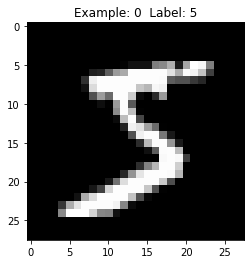

In [ ]:
view_digit(0)

# 차원 축소 알고리즘

**선형 투영 VS 매니폴드 학습**

* 선형 투영 : 고차원 공간에서 저차원 공간으로 선형적으로 데이터를 투영
  - 주성분 분석
  - 특잇값 분해
  - 랜덤 투영

* 매니폴드 학습 : 비선형 차원 축소
  - 아이소맵 : 유클리드 거리가 아닌 데이터 포인트들 사이 곡선 거리 (지오데식 거리)를 학습
  - 다차원 스케일링
  - 지역 선형 임베딩
  - t-분포 확률적 임베딩
  - 사전 학습
  - 랜덤 트리 임베딩
  - 독립 성분 분석

## 선형 투영

### PCA

#### PCA 개요

* 가능한 한 분산 (핵심 정보)을 보존하면서 데이터의 저차원 표현을 찾아냄

* 피처들 간 상관관계를 다룸

* 일부 피처들 간 상관관계가 매우 높으면 PCA는 상관관계가 높은 피처들을 결합해 선형적인 상관관계가 없는, 더 작은 수의 피처들로 데이터를 표현

* 원본 고차원 데이터에서 최대 분산 방향을 찾음으로써 상관관계를 지속적으로 감소시키고 더 작은 차원 공간에 이들을 투영하고 이렇게 파생된 성분을 주성분이라고 함

* PCA를 실행하기 전에는 피처 스케일링을 수행해야 한다. PCA는 원본 피처들을 상대적 범위에 매우 민감하기 때문이다

#### 하이퍼 파라미터 설정

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
N_COMPONENTS = 784
WHITEN = False
RANDOM_STATE = 2022

In [ ]:
pca = PCA(n_components=N_COMPONENTS,
          whiten=WHITEN,
          random_state=RANDOM_STATE)

#### PCA 적용

In [ ]:
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

#### PCA 평가

차원을 축소하지 않았기 때문에 주성분 784개로 추출한 원본 데이터의 분산/정보는 100%가 되어야 한다

In [ ]:
print("Variance Explained by all 784 principal components: ", sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999871732004


In [ ]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

* 전체 중 처음 10개 주성분이 총 분산의 약 50%를 잡아내고, 처음 100개 주성분이 약 90% 이상을, 처음 300개 주성분이 총 분산의 거의 99%를 잡아냄

* 나머지 주성분의 정보는 무시할 수 있는 값이다


In [ ]:
print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876226]
Variance Captured by First 20 Principal Components:  [0.6439802]
Variance Captured by First 50 Principal Components:  [0.8248609]
Variance Captured by First 100 Principal Components:  [0.9146585]
Variance Captured by First 200 Principal Components:  [0.9665007]
Variance Captured by First 300 Principal Components:  [0.9862489]


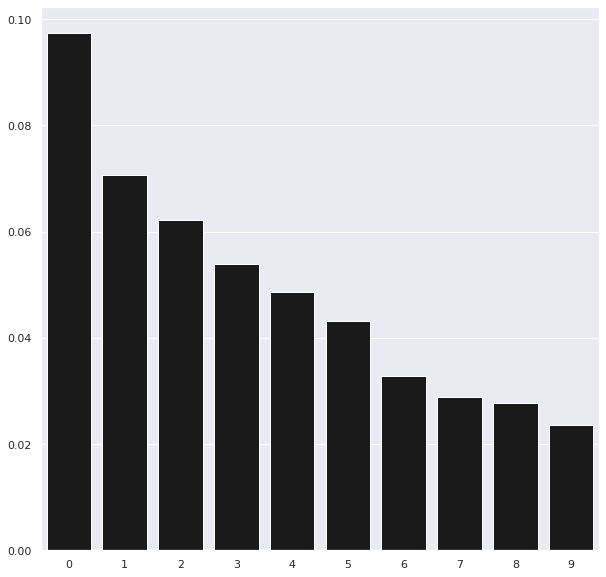

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

#### PCA로 데이터 분리해서 시각화

PCA는 단지 상위 두 개 주성분만 사용해 전반적으로 비슷한 데이터들이 서로 더 가까워지도록 데이터 포인트들을 잘 분리함

In [ ]:
def scatterPlot(xDF, yDF, algoName):

  tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
  tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
  tempDF.columns = ["First Vector", "Second Vector", "Label"]

  sns.lmplot(x="First Vector", y="Second Vector",
             hue="Label", 
             data=tempDF,
             fit_reg=False)
  
  ax = plt.gca()
  ax.set_title("Separation of Observations using "+algoName)

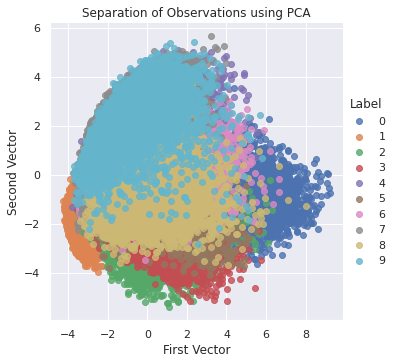

In [ ]:
scatterPlot(X_train_PCA, y_train, "PCA")

이와 달리, 원본 데이터의 784개 피처셋에서 지도 학습 모델에 의해 결정된 가장 중요한 피처 두 개를 선택해 동일한 2차원 산점도를 실행하면 잘 분리되지 않음

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

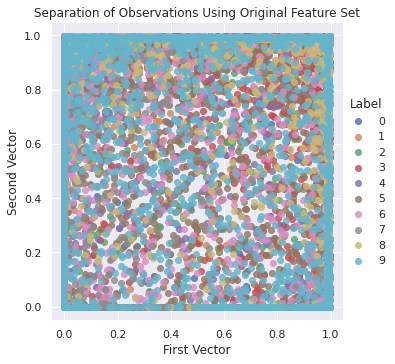

In [ ]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]

sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

### 점진적 PCA

* 데이터 셋의 크기가 매우 커서 메모리에 저장할 수 없는 경우, 메모리에 저장되는 크기로 배치를 작게 설정해 점진적으로 PCA를 수행할 수 있음

* 배치 크기는 수동으로 설정하거나 자동으로 결정할 수 있음

* 일반 PCA와 점진적 PCA의 주성분 결과는 일반적으로 매우 유사함

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
N_COMPONENTS = 784
BATCH_SIZE = None

In [ ]:
incrementalPCA = IncrementalPCA(n_components=N_COMPONENTS,
                                batch_size=BATCH_SIZE)

In [ ]:
X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = pd.DataFrame(data=X_train_incrementalPCA,
                                      index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_val)
X_validation_incrementalPCA = pd.DataFrame(data=X_validation_incrementalPCA,
                                           index=val_index)

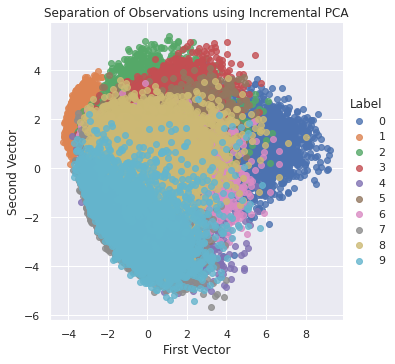

In [ ]:
scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

### 희소 PCA

* 일반 PCA 알고리즘은 모든 입력 변수에 선형 결합을 탐색해 원본 피처 공간을 최대한 조밀하게 줄인다

* 그러나 일부 머신러닝 문제의 경우 어느 정도의 희소성이 선호될 수 있다

* alpha라는 하이퍼 파라미터로 제어함으로써 희소성을 어느 정도 유지할 수 있다

* 희소 PCA는 일부 입력 변수에서만 선형 결합을 탐색해 원본 피처 공간을 어느 정도 줄이지만 일반 PCA만큼 조밀하게 만들지는 않음

In [ ]:
from sklearn.decomposition import SparsePCA

In [ ]:
N_COMPONENTS = 100
ALPHA = 0.0001
RANDOM_STATE = 2022
N_JOBS = -1

In [ ]:
sparsePCA = SparsePCA(n_components=N_COMPONENTS,
                      alpha=ALPHA,
                      random_state=RANDOM_STATE,
                      n_jobs=N_JOBS)

In [ ]:
sparsePCA.fit(X_train)

X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA,
                                 index=train_index)

X_val_sparsePCA = sparsePCA.transform(X_val)
X_val_sparsePCA = pd.DataFrame(data=X_val_sparsePCA,
                               index=val_index)

* 예상대로 이 산점도는 일반 PCA의 산점도와 다르게 보임

* 일반 PCA와 희소 PCA는 주성분을 서로 다르게 생성하며 관측치의 분리도 조금 다름

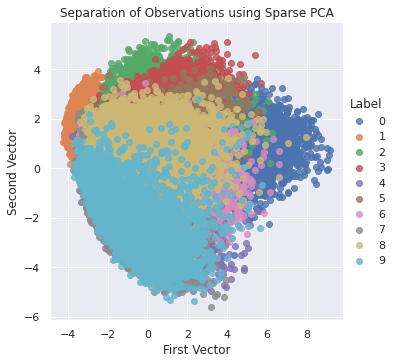

In [ ]:
scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

### 커널 PCA

* 비선형 PCA 유형 중 하나인 커널 PCA는 원본 데이터 포인트 쌍들에 대해 유사성 함수를 실행시켜 비선형적으로 차원을 축소

* 커널 PCA는 이 유사성 함수를 학습함으로써 데이터 포인트 대부분이 있는 암시적 피처 공간을 매핑하고 이 공간을 원본 피처 셋 보다 훨씬 더 작은 수의 차원을 만듬

* 이 방법은 원본 피처 셋을 선형으로 분리할 수 없는 경우에 특히 효과적이다

* 커널 PCA 알고리즘의 경우 원하는 주성분의 수, 커널 유형, gamma라는 커널 계수를 설정해야 함

* 가장 많이 사용하는 커널은 방사형 기저 함수 커널 (RBF)이다

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
N_COMPONENTS = 100
KERNEL = 'rbf'
GAMMA = None
RANDOM_STATE = 2022
N_JOBS = 1

In [ ]:
kernelPCA = KernelPCA(n_components=N_COMPONENTS,
                      kernel=KERNEL,
                      gamma=GAMMA,
                      n_jobs=N_JOBS,
                      random_state=RANDOM_STATE)

In [ ]:
kernelPCA.fit(X_train.loc[:10000, :])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,
                                 index=train_index)

X_val_kernelPCA = kernelPCA.transform(X_val)
X_val_kernelPCA = pd.DataFrame(data=X_val_kernelPCA, 
                               index=val_index)

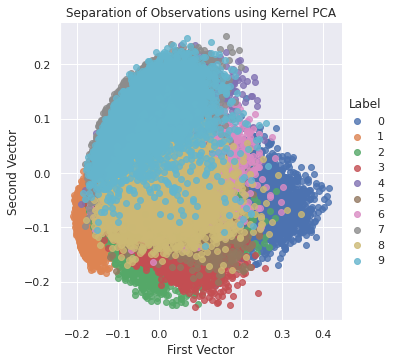

In [ ]:
scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

### SVD

* 원본 행렬의 계수(rank)를 더 작은 계수로 줄이고 더 작은 계수 행렬에서 일부 벡터의 선형 결합을 사용해 원본 행렬을 다시 만듬

* 더 작은 계수 행렬을 생성하기 위해 SVD는 가장 많은 정보를 가진 원본 행렬의 벡터를 유지함 (가장 높은 특잇값)

* 더 작은 계수 행렬은 원본 피처 공간의 가장 중요한 요소들을 포착함

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
N_COMPONENTS = 200
ALGORITHM = 'randomized'
N_ITER = 5
RANDOM_STATE = 2022

In [ ]:
svd = TruncatedSVD(n_components=N_COMPONENTS,
                   algorithm=ALGORITHM,
                   n_iter=N_ITER,
                   random_state=RANDOM_STATE)

In [ ]:
svd.fit(X_train)
X_train_svd = svd.transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd,
                                 index=train_index)

X_val_svd = svd.transform(X_val)
X_val_svd = pd.DataFrame(data=X_val_svd, 
                               index=val_index)

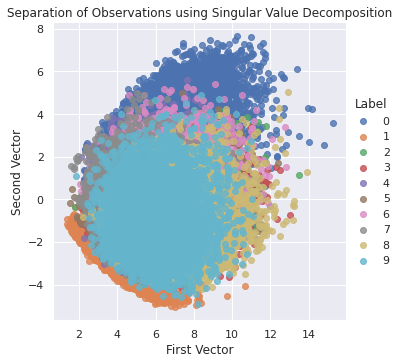

In [ ]:
scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

### 랜덤 투영

* 존슨-린텐슈트라우스 보조정리 기반의 랜덤 투영

* 존슨-린텐슈트라우스 보조정리에 따르면, 고차원 공간의 데이터 포인터들은 포인트 사이의 거리가 거의 보존되는 방식으로 훨씬 더 낮은 차원의 공간에 삽입될 수 있다

* 즉, 고차원 공간에서 저차원 공간으로 이동하는 경우에도 원본 피처 셋의 핵심 정보가 유지된다

#### GRP

* 가우시안 랜덤 투영의 경우 축소된 피처 공간에 갖고 싶은 주성분 수를 설정하거나 하이퍼 파라미터인 입실론을 설정할 수 있다

* 입실론은 존슨-린덴슈트라우스 보조정리에 따라 임베딩의 품질을 제어하며 이 값이 작을수록 차원의 수가 높아진다

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

In [ ]:
N_COMPONENTS = 'auto'
EPS = 0.5
RANDOM_STATE = 2022

In [ ]:
GRP = GaussianRandomProjection(n_components=N_COMPONENTS,
                               eps=EPS,
                               random_state=RANDOM_STATE)

In [ ]:
X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_val_GRP = GRP.transform(X_val)
X_val_GRP = pd.DataFrame(data=X_val_GRP, index=val_index)

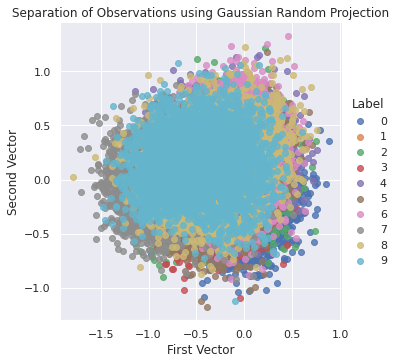

In [ ]:
scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

#### SRP

* 희소 랜덤 투영은 변환된 피처 셋에서 어느 정도의 희소성을 유지

* 일반적으로 가우시안 랜덤 투영보다 훨씬 빠르게 원본 데이터를 축소된 공간으로 변환시킴으로써 효율적이다

In [ ]:
from sklearn.random_projection import SparseRandomProjection

In [ ]:
N_COMPONENTS = 'auto'
DENSITY = 'auto'
EPS = 0.5
DENSE_OUTPUT = False
RANDOM_STATE = 2022

In [ ]:
SRP = SparseRandomProjection(n_components=N_COMPONENTS,
                             density=DENSITY,
                             eps=EPS, 
                             dense_output=DENSE_OUTPUT,
                             random_state=RANDOM_STATE)

In [ ]:
X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP,
                           index=train_index)

X_val_SRP = SRP.transform(X_val)
X_val_SRP = pd.DataFrame(data=X_val_SRP, index=val_index)

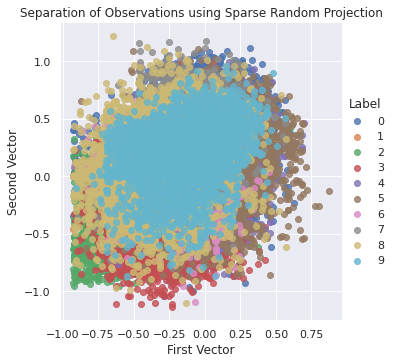

In [ ]:
scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

## 비선형 투영

* 고차원에서 저차원 공간으로 데이터를 선형으로 투영하는 대신 비선형 차원 축소 방법을 사용한 걸 매니폴드 학습이라고 한다

### Isomap

* 커널 PCA와 마찬가지로 유클리드 거리가 아닌 곡선 거리로 모든 데이터 간의 쌍별 거리를 계산해 원본 피처 셋의 새로운 저차원 임베딩을 학습함

* 즉, Isomap은 매니폴드 공간에서 각 포인트들과 이웃하는 포인트들 간의 상대적인 위치를 기반으로 원본 데이터의 고유한 기하학 구조를 학습한다

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
N_NEIGHBORS = 5
N_COMPONENTS = 10
N_JOBS = 1

In [ ]:
isomap = Isomap(n_neighbors=N_NEIGHBORS,
                n_components=N_COMPONENTS,
                n_jobs=N_JOBS)

In [ ]:
isomap.fit(X_train.loc[0:5000,:])

X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap,
                              index=train_index)

X_val_isomap = isomap.transform(X_val)
X_val_isomap = pd.DataFrame(data=X_val_isomap,
                            index=val_index)

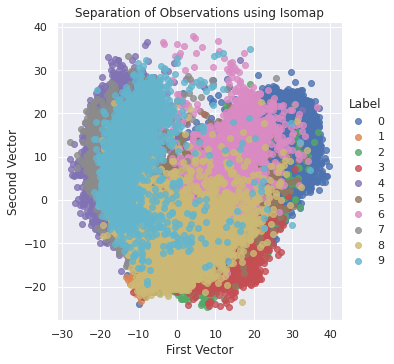

In [ ]:
scatterPlot(X_train_isomap, y_train, "Isomap")

### MDS

* 원본 데이터 셋에서 데이터 포인트들의 유사성을 학습하고, 이 유사성 학습 결과를 사용해 더 낮은 차원에서 이것을 모델링한다

In [ ]:
from sklearn.manifold import MDS

In [ ]:
N_COMPONENTS = 2
N_INIT = 12
MAX_ITER = 1200
METRIC = True
N_JOBS = 1
RANDOM_STATE = 2022

In [ ]:
mds = MDS(n_components=N_COMPONENTS,
          n_init=N_INIT,
          max_iter=MAX_ITER,
          metric=METRIC,
          n_jobs=N_JOBS, 
          random_state=RANDOM_STATE)

In [ ]:
X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

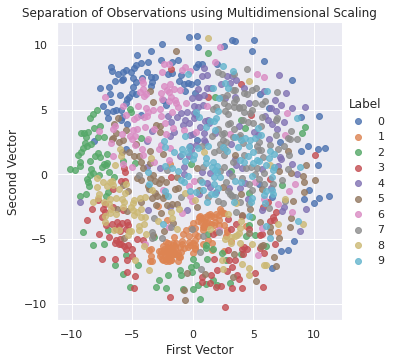

In [ ]:
scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

### LLE

* 원본 피처 공간에서 축소된 공간으로 투영할 때 지역 내 이웃과의 거리를 유지

* LLE는 데이터를 더 작은 성분 (즉, 포인트들의 이웃)으로 분할하고 각 성분을 선형 임베딩으로 모델링해 원본 고차원 데이터에서 비선형 구조를 발견함

* 우리가 원하는 성분의 수와 주어진 이웃에서 고려해야 할 포인트 수를 설정함

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
N_NEIGHBORS = 10
N_COMPONENTS = 2
METHOD = 'modified'
N_JOBS = 1
RANDOM_STATE = 2022

In [ ]:
lle = LocallyLinearEmbedding(n_neighbors=N_NEIGHBORS,
                             n_components=N_COMPONENTS,
                             method=METHOD,
                             random_state=RANDOM_STATE,
                             n_jobs=N_JOBS)

In [ ]:
lle.fit(X_train.loc[0:5000,:])

X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_val_lle = lle.transform(X_val)
X_val_lle = pd.DataFrame(data=X_val_lle, index=val_index)

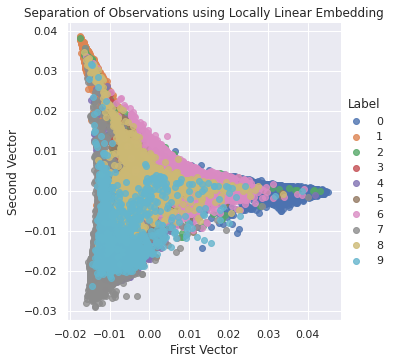

In [ ]:
scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

### t - SNE

* 고차원 데이터를 시각화하기 위한 비선형 차원 축소 기법

* t - SNE는 각 고차원 데이터 포인트를 2차원 또는 3차원 공간으로 모델링해 이를 수행

* 유사한 포인트들은 서로 가깝게 모델링되고 유사히지 않은 포인트들은 더 멀리 모델링함

* 이는 포인트 쌍들을 이용해 고차원 확률 분포와 저차원 확률 분포를 각각 만듦으로써 수행

* 유사한 포인트들은 높은 확률값을 가지고 유사하지 않은 포인트들은 낮은 확률값을 가지게 된다

* 특히 t - SNE는 두 확률 분포 간 쿨백-라이블러 발산(KLD)을 최소화한다

* t - SNE를 실제 적용할 때는 PCA와 같은 다른 차원 축소 기술을 사용해 차원의 수를 줄인 다음에 사용하는 것이 좋음

* 다른 유형의 차원 축소를 먼저 적용함으로써 t - SNE에 공급되는 피처의 노이즈를 줄이고 알고리즘의 계산 속도를 높임

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
N_COMPONENTS = 2
LEARNING_RATE = 300
PERPLEXITY = 30
EARLY_EXAGGERATION = 12
INIT = 'random'
RANDOM_STATE = 2022

In [ ]:
tSNE = TSNE(n_components=N_COMPONENTS,
            learning_rate=LEARNING_RATE,
            perplexity=PERPLEXITY,
            early_exaggeration=EARLY_EXAGGERATION,
            init=INIT,
            random_state=RANDOM_STATE)

In [ ]:
X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

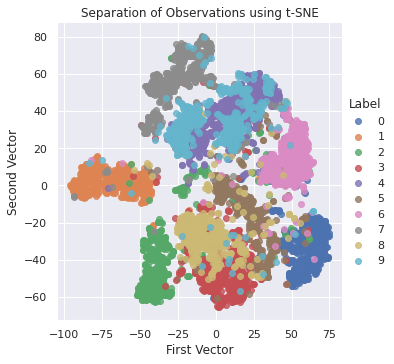

In [ ]:
scatterPlot(X_train_tSNE, y_train, "t-SNE")

## 사전 학습

* 원본 데이터의 희소 표현을 학습

* 사전 : 결과 행렬

* 원자 : 이 사전을 구성하는 벡터
  - 원자는 0과 1로 채워진 간단한 이진 벡터
  - 원본 데이터의 각 인스턴스는 이러한 원자의 가중 합으로 재구성될 수 있다

* 원본 데이터에 d 피처가 있고 사전에 n개 원자가 있다고 가정
  - n < d인 과소완전 사전 : 차원 축소를 통해 더 작은 수의 벡터로 원본 데이터를 표현
  - n > d인 과대완전 사전

In [ ]:
from sklearn.decomposition import MiniBatchDictionaryLearning

In [ ]:
N_COMPONENTS = 50
ALPHA = 1
BATCH_SIZE = 200
N_ITER = 25
RANDOM_STATE = 2022

In [ ]:

miniBatchDictLearning = MiniBatchDictionaryLearning(n_components=N_COMPONENTS, 
                                                    alpha=ALPHA, 
                                                    batch_size=BATCH_SIZE,
                                                    n_iter=N_ITER,
                                                    random_state=RANDOM_STATE)

In [ ]:
miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame(data=X_train_miniBatchDictLearning,
                                             index=train_index)

X_val_miniBatchDictLearning = miniBatchDictLearning.transform(X_val)
X_val_miniBatchDictLearning = pd.DataFrame(data=X_val_miniBatchDictLearning,
                                           index=val_index)

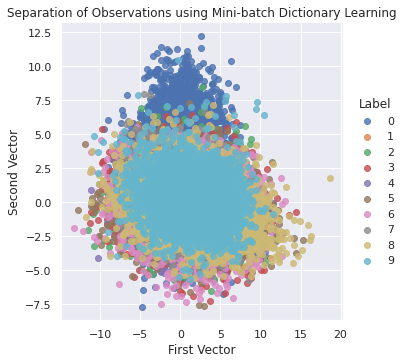

In [ ]:
scatterPlot(X_train_miniBatchDictLearning, y_train, "Mini-batch Dictionary Learning")

## ICA

* 레이블이 없는 데이터의 공통 문제 중 하나는 주어진 피처에 수많은 독립 신호가 함께 포함됐다는 것이다

* ICA를 사용해 이러한 혼합 신호를 개별 성분으로 분리할 수 있다

* 분리가 완료되면 생성된 개별 성분들은 여러 방식으로 조합해 원본 피처를 재구성할 수 있다

* ICA는 일반적으로 신호 처리 작업에 사용

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
N_COMPONENTS = 25
ALGORITHM = 'parallel'
WHITEN = True
MAX_ITER = 100
RANDOM_STATE = 2022

In [ ]:
fastICA = FastICA(n_components=N_COMPONENTS,
                  algorithm=ALGORITHM,
                  whiten=WHITEN,
                  max_iter=MAX_ITER, 
                  random_state=RANDOM_STATE)

In [ ]:
X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA,
                               index=train_index)

X_val_fastICA = fastICA.transform(X_val)
X_val_fastICA = pd.DataFrame(data=X_val_fastICA,
                            index=val_index)

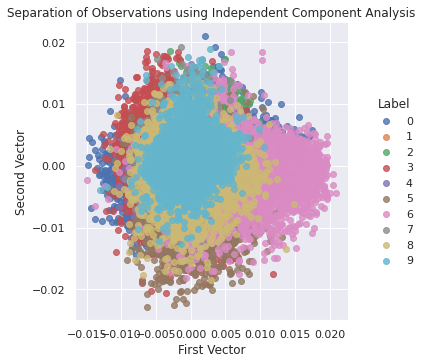

In [ ]:
scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")